### Import Initial Dependency and Read CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Resources/temps_to_7.csv")
df

,fire_index,fire_size,fire_cause,latitude,longitude,state,discovery_month,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,year,putout_time
0,3,1.00,Debris Burning,39.641400,-119.308300,NV,Jun,16.275967,18.996181,18.142564,4.054982,3.398329,3.671282,44.778429,37.140811,35.353846,2005,0
1,24,40.00,Arson,31.435181,-88.999489,MS,Apr,13.468619,15.067227,15.604790,2.038268,1.737921,1.775904,57.997207,56.747191,59.614458,1999,0
2,31,1.20,Debris Burning,48.833000,-99.783600,ND,Apr,-0.891635,0.372659,-4.273834,5.800667,6.012852,6.658621,77.575012,75.963981,71.173116,2007,0
3,35,30.18,Debris Burning,31.259000,-84.895600,GA,Oct,20.079480,17.722714,18.188679,3.659840,3.366443,2.211429,67.551783,61.733788,60.328571,2000,0
4,36,1420.00,Lightning,33.241800,-104.912200,NM,Jul,31.055859,32.523438,34.893333,4.026367,3.844922,3.695833,28.783203,25.789062,18.208333,1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13133,55336,3409.00,Utilities,31.059000,-98.956367,TX,Aug,30.731860,30.545367,28.719917,3.136761,3.238803,3.224274,50.089157,49.416505,55.426471,2015,3
13134,55337,4582.00,Utilities,30.075167,-97.149167,TX,Oct,24.642268,23.713390,24.221869,1.529850,1.576828,1.563817,62.848172,60.641975,63.196819,2015,11
13135,55341,17823.00,Accidental,44.834600,-117.220600,OR,Sep,15.546194,12.890633,10.734328,2.608150,2.486802,1.835821,55.009259,62.368700,67.266304,2015,39
13136,55342,5086.00,Debris Burning,45.656100,-109.114200,MT,Mar,2.275974,7.360185,7.678571,4.428757,4.197593,3.803571,51.676681,46.933399,42.638384,2015,5


### Groupby Year

In [3]:
df_new=df[['fire_size','Temp_pre_30', 'Temp_pre_15', 'Temp_pre_7',
       'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7', 'Hum_pre_30', 'Hum_pre_15',
       'Hum_pre_7', 'putout_time', 'year']]

In [4]:
df.describe()


,fire_index,fire_size,latitude,longitude,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,year,putout_time
count,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000
mean,30561.860786,4815.680966,38.853198,-100.262668,16.114442,16.723076,17.188074,3.107480,3.086503,3.049101,57.362435,56.374150,55.204210,2004.975415,7.611889
std,16928.617595,22574.046327,7.866336,18.010921,8.340708,8.204292,8.239245,1.135970,1.172643,1.249775,15.769584,16.066871,16.465692,7.197763,22.113532
min,3.000000,0.510000,18.001111,-165.116700,-14.160823,-13.271772,-18.078000,0.222890,0.115385,0.015308,7.263812,5.977778,6.464286,1992.000000,0.000000
25%,15872.500000,1.742500,33.335300,-113.327602,9.913342,10.423939,10.856201,2.280719,2.232094,2.144755,47.350485,46.095195,44.359881,1999.000000,0.000000
50%,31102.500000,6.000000,36.441133,-95.377955,16.746059,17.276307,17.845641,3.016877,2.991838,2.940377,61.941256,60.427373,58.553892,2006.000000,0.000000
75%,46735.250000,125.750000,43.126590,-85.179121,22.880248,23.272855,23.754613,3.837322,3.828269,3.811617,69.109660,68.373622,67.631824,2011.000000,2.000000
max,55343.000000,538049.000000,69.047200,-67.047639,41.677820,51.567797,52.014493,10.785003,10.592535,12.681673,89.847575,91.473214,95.240000,2015.000000,371.000000


In [5]:
y_mean=df_new.groupby(["year"]).mean()
y_mean

,fire_size,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,putout_time
year,,,,,,,,,,,
1992,1831.124202,15.592843,16.020736,16.363557,3.183887,3.170876,3.146392,60.740141,59.779710,58.231916,1.647191
1993,1668.160215,17.442903,17.723921,17.927767,2.998192,3.008813,2.979560,59.226055,57.884323,56.612064,3.420601
1994,2978.618566,17.840691,18.563766,18.846434,3.244630,3.236048,3.205376,51.597871,50.905100,50.118777,5.843750
1995,1214.177243,16.782899,17.152386,17.491968,3.268093,3.237998,3.216394,58.431188,57.707390,56.660446,1.563786
1996,4642.918991,15.656558,15.985688,16.411578,3.437913,3.403946,3.312708,54.711721,54.142551,52.755748,3.859459
1997,2786.787170,16.523220,17.102459,17.445115,3.109363,3.097395,3.030050,61.800194,60.643255,59.465455,3.345912
1998,1411.574320,19.069170,19.378842,19.303639,2.993312,2.953298,2.918530,59.952288,58.685662,57.415693,2.911565
1999,5771.447732,17.331916,17.521583,17.792801,3.145097,3.107099,3.069705,55.672747,55.015703,53.613112,3.844181
2000,6367.821065,18.174747,18.899379,19.340780,3.329774,3.270686,3.210417,50.471478,49.513133,48.776975,11.749533


In [6]:
y_sum=df_new.groupby(["year"]).sum()
y_sum

,fire_size,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,putout_time
year,,,,,,,,,,,
1992,814850.27,6938.815280,7129.227517,7281.782848,1416.829672,1411.039891,1400.144287,27029.362770,26601.971159,25913.202475,733
1993,777362.66,8128.392624,8259.347179,8354.339546,1397.157281,1402.106835,1388.475027,27599.341749,26974.094720,26381.221870,1594
1994,1620368.50,9705.336026,10098.688557,10252.460351,1765.078758,1760.410187,1743.724645,28069.241655,27692.374303,27264.614621,3179
1995,590090.14,8156.489123,8336.059757,8501.096494,1588.293329,1573.666796,1563.167616,28397.557411,28045.791387,27536.976580,760
1996,2576820.04,8689.389619,8872.057043,9108.425624,1908.041889,1889.189977,1838.552858,30365.005064,30049.115881,29279.440150,2142
1997,886198.32,5254.383983,5438.582082,5547.546571,988.777479,984.971498,963.555923,19652.461597,19284.554989,18910.014766,1064
1998,415002.85,5606.335903,5697.379535,5675.269807,880.033623,868.269663,858.047959,17625.972568,17253.584610,16880.213745,856
1999,2926124.00,8787.281481,8883.442532,9020.949987,1594.564352,1575.299111,1556.340454,28226.082703,27892.961231,27181.847893,1949
2000,3406784.27,9723.489699,10111.167723,10347.317295,1781.429248,1749.816982,1717.572912,27002.240614,26489.526013,26095.681792,6286


In [7]:
y_count=df_new.groupby(["year"]).count()
y_count

,fire_size,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,putout_time
year,,,,,,,,,,,
1992,445,445,445,445,445,445,445,445,445,445,445
1993,466,466,466,466,466,466,466,466,466,466,466
1994,544,544,544,544,544,544,544,544,544,544,544
1995,486,486,486,486,486,486,486,486,486,486,486
1996,555,555,555,555,555,555,555,555,555,555,555
1997,318,318,318,318,318,318,318,318,318,318,318
1998,294,294,294,294,294,294,294,294,294,294,294
1999,507,507,507,507,507,507,507,507,507,507,507
2000,535,535,535,535,535,535,535,535,535,535,535


### Groupby Month

In [8]:
df_new=df[['fire_size','Temp_pre_30', 'Temp_pre_15', 'Temp_pre_7',
       'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7', 'Hum_pre_30', 'Hum_pre_15',
       'Hum_pre_7', 'putout_time', 'discovery_month']]

In [9]:
df.describe()


,fire_index,fire_size,latitude,longitude,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,year,putout_time
count,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000
mean,30561.860786,4815.680966,38.853198,-100.262668,16.114442,16.723076,17.188074,3.107480,3.086503,3.049101,57.362435,56.374150,55.204210,2004.975415,7.611889
std,16928.617595,22574.046327,7.866336,18.010921,8.340708,8.204292,8.239245,1.135970,1.172643,1.249775,15.769584,16.066871,16.465692,7.197763,22.113532
min,3.000000,0.510000,18.001111,-165.116700,-14.160823,-13.271772,-18.078000,0.222890,0.115385,0.015308,7.263812,5.977778,6.464286,1992.000000,0.000000
25%,15872.500000,1.742500,33.335300,-113.327602,9.913342,10.423939,10.856201,2.280719,2.232094,2.144755,47.350485,46.095195,44.359881,1999.000000,0.000000
50%,31102.500000,6.000000,36.441133,-95.377955,16.746059,17.276307,17.845641,3.016877,2.991838,2.940377,61.941256,60.427373,58.553892,2006.000000,0.000000
75%,46735.250000,125.750000,43.126590,-85.179121,22.880248,23.272855,23.754613,3.837322,3.828269,3.811617,69.109660,68.373622,67.631824,2011.000000,2.000000
max,55343.000000,538049.000000,69.047200,-67.047639,41.677820,51.567797,52.014493,10.785003,10.592535,12.681673,89.847575,91.473214,95.240000,2015.000000,371.000000


In [10]:
m_mean=df_new.groupby(["discovery_month"]).mean()
m_mean

,fire_size,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,putout_time
discovery_month,,,,,,,,,,,
Apr,1342.351206,9.145262,10.466959,11.323696,3.636094,3.658950,3.627004,62.714784,61.046446,59.461977,1.971077
Aug,8286.114180,23.790142,23.788391,23.812546,2.852593,2.814947,2.768814,48.618019,47.968775,47.317106,12.893219
Dec,170.209596,8.867868,7.932944,6.754798,2.769104,2.755344,2.752742,69.333207,69.153245,67.897330,0.250000
Feb,135.695998,7.081745,7.639364,8.645474,2.917051,2.931899,2.948989,67.124085,66.181901,64.258960,0.240977
Jan,779.781825,7.483089,7.563393,8.051298,2.954624,2.926858,2.865886,68.605748,67.951247,65.884914,1.467153
Jul,8285.592675,22.537327,23.616684,24.215611,3.171452,3.073789,3.017614,48.510615,47.639501,47.020576,14.860136
Jun,13190.804902,19.626803,20.862204,22.104467,3.247476,3.205293,3.121067,50.424544,49.604467,47.925200,19.638492
Mar,253.154720,8.106760,9.524696,10.192804,3.259707,3.303566,3.308535,65.373577,64.000316,62.576400,0.491445
May,4229.202969,15.206741,16.629095,17.622007,3.435634,3.358011,3.284144,56.916305,55.806034,54.724425,5.945838


In [11]:
m_sum=df_new.groupby(["discovery_month"]).sum()
m_sum

,fire_size,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,putout_time
discovery_month,,,,,,,,,,,
Apr,2181320.71,14861.050295,17008.808193,18401.006117,5908.653169,5945.794127,5893.881561,101911.524656,99200.474111,96625.713336,3203
Aug,15519891.86,44558.935400,44555.655957,44600.898672,5342.906846,5272.394999,5185.988761,91061.549045,89845.515156,88624.938981,24149
Dec,46297.01,2412.060207,2157.760783,1837.305189,753.196348,749.453647,748.745953,18858.632386,18809.682632,18468.073880,68
Feb,127825.63,6671.003728,7196.281248,8144.036115,2747.861788,2761.849311,2777.947918,63230.888235,62343.350922,60531.940568,227
Jan,106830.11,1025.183143,1036.184859,1103.027760,404.783503,400.979550,392.626352,9398.987486,9309.320825,9026.233264,201
Jul,17002036.17,46246.595786,48461.435169,49690.432925,6507.819684,6307.415035,6192.143147,99543.782562,97756.256695,96486.221568,30493
Jun,20287457.94,30186.022576,32086.070369,33996.669497,4994.618541,4929.740351,4800.200340,77552.948612,76291.669766,73708.958001,30204
Mar,429097.25,13740.958293,16144.358959,17276.803256,5525.203680,5599.543710,5607.966611,110808.213499,108480.536380,106066.998518,833
May,4216515.36,15161.120895,16579.207252,17569.141274,3425.327411,3347.937341,3274.291788,56745.556283,55638.615933,54560.251727,5928


In [12]:
m_count=df_new.groupby(["discovery_month"]).count()
m_count

,fire_size,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,putout_time
discovery_month,,,,,,,,,,,
Apr,1625,1625,1625,1625,1625,1625,1625,1625,1625,1625,1625
Aug,1873,1873,1873,1873,1873,1873,1873,1873,1873,1873,1873
Dec,272,272,272,272,272,272,272,272,272,272,272
Feb,942,942,942,942,942,942,942,942,942,942,942
Jan,137,137,137,137,137,137,137,137,137,137,137
Jul,2052,2052,2052,2052,2052,2052,2052,2052,2052,2052,2052
Jun,1538,1538,1538,1538,1538,1538,1538,1538,1538,1538,1538
Mar,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695
May,997,997,997,997,997,997,997,997,997,997,997


### Groupby Cause

In [13]:
df_new=df[['fire_size','Temp_pre_30', 'Temp_pre_15', 'Temp_pre_7',
       'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7', 'Hum_pre_30', 'Hum_pre_15',
       'Hum_pre_7', 'putout_time', 'fire_cause']]

In [14]:
df.describe()


,fire_index,fire_size,latitude,longitude,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,year,putout_time
count,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000
mean,30561.860786,4815.680966,38.853198,-100.262668,16.114442,16.723076,17.188074,3.107480,3.086503,3.049101,57.362435,56.374150,55.204210,2004.975415,7.611889
std,16928.617595,22574.046327,7.866336,18.010921,8.340708,8.204292,8.239245,1.135970,1.172643,1.249775,15.769584,16.066871,16.465692,7.197763,22.113532
min,3.000000,0.510000,18.001111,-165.116700,-14.160823,-13.271772,-18.078000,0.222890,0.115385,0.015308,7.263812,5.977778,6.464286,1992.000000,0.000000
25%,15872.500000,1.742500,33.335300,-113.327602,9.913342,10.423939,10.856201,2.280719,2.232094,2.144755,47.350485,46.095195,44.359881,1999.000000,0.000000
50%,31102.500000,6.000000,36.441133,-95.377955,16.746059,17.276307,17.845641,3.016877,2.991838,2.940377,61.941256,60.427373,58.553892,2006.000000,0.000000
75%,46735.250000,125.750000,43.126590,-85.179121,22.880248,23.272855,23.754613,3.837322,3.828269,3.811617,69.109660,68.373622,67.631824,2011.000000,2.000000
max,55343.000000,538049.000000,69.047200,-67.047639,41.677820,51.567797,52.014493,10.785003,10.592535,12.681673,89.847575,91.473214,95.240000,2015.000000,371.000000


In [15]:
c_mean=df_new.groupby(["fire_cause"]).mean()
c_mean

,fire_size,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,putout_time
fire_cause,,,,,,,,,,,
Accidental,2212.257002,13.969049,14.679785,15.110460,3.338561,3.325150,3.314762,58.343436,57.076924,55.912175,2.226227
Arson,975.457218,13.970466,14.497574,14.850972,3.089569,3.088716,3.083192,63.765884,62.519592,61.092513,1.253736
Debris Burning,455.269692,12.448499,13.021800,13.433030,2.946110,2.960909,2.938212,65.128772,64.085816,62.573984,0.766051
Lightning,12419.892797,20.837946,21.552894,22.215188,3.117840,3.047957,2.963351,46.736991,46.085803,45.327989,20.933190
Utilities,3141.588726,17.563891,18.006321,18.266246,3.305921,3.294987,3.271319,55.635568,54.571424,53.551446,2.594781


In [16]:
c_sum=df_new.groupby(["fire_cause"]).sum()
c_sum

,fire_size,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,putout_time
fire_cause,,,,,,,,,,,
Accidental,2884783.13,18215.640229,19142.439453,19704.039491,4353.483128,4335.995762,4322.449456,76079.840849,74428.309490,72909.476249,2903
Arson,2871746.05,41129.052651,42680.857122,43721.262813,9095.690434,9093.180570,9076.918238,187726.762461,184057.678533,179856.358998,3691
Debris Burning,1552924.92,42461.830081,44417.359318,45820.064121,10049.179671,10099.659556,10022.240396,222154.241347,218596.719855,213439.860911,2613
Lightning,51865472.32,87019.262466,90004.886031,92770.625837,13020.098244,12728.267729,12374.954877,195173.675394,192454.312962,189289.683645,87417
Utilities,4093490.11,22885.750214,23462.236485,23800.918778,4307.615477,4293.368363,4262.528477,72493.144475,71106.565528,69777.533881,3381


In [17]:
c_count=df_new.groupby(["fire_cause"]).count()
c_count

,fire_size,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,putout_time
fire_cause,,,,,,,,,,,
Accidental,1304,1304,1304,1304,1304,1304,1304,1304,1304,1304,1304
Arson,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944
Debris Burning,3411,3411,3411,3411,3411,3411,3411,3411,3411,3411,3411
Lightning,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176
Utilities,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303


### Groupby State

In [18]:
df_new=df[['fire_size','Temp_pre_30', 'Temp_pre_15', 'Temp_pre_7',
       'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7', 'Hum_pre_30', 'Hum_pre_15',
       'Hum_pre_7', 'putout_time', 'state']]

In [19]:
df.describe()


,fire_index,fire_size,latitude,longitude,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,year,putout_time
count,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000
mean,30561.860786,4815.680966,38.853198,-100.262668,16.114442,16.723076,17.188074,3.107480,3.086503,3.049101,57.362435,56.374150,55.204210,2004.975415,7.611889
std,16928.617595,22574.046327,7.866336,18.010921,8.340708,8.204292,8.239245,1.135970,1.172643,1.249775,15.769584,16.066871,16.465692,7.197763,22.113532
min,3.000000,0.510000,18.001111,-165.116700,-14.160823,-13.271772,-18.078000,0.222890,0.115385,0.015308,7.263812,5.977778,6.464286,1992.000000,0.000000
25%,15872.500000,1.742500,33.335300,-113.327602,9.913342,10.423939,10.856201,2.280719,2.232094,2.144755,47.350485,46.095195,44.359881,1999.000000,0.000000
50%,31102.500000,6.000000,36.441133,-95.377955,16.746059,17.276307,17.845641,3.016877,2.991838,2.940377,61.941256,60.427373,58.553892,2006.000000,0.000000
75%,46735.250000,125.750000,43.126590,-85.179121,22.880248,23.272855,23.754613,3.837322,3.828269,3.811617,69.109660,68.373622,67.631824,2011.000000,2.000000
max,55343.000000,538049.000000,69.047200,-67.047639,41.677820,51.567797,52.014493,10.785003,10.592535,12.681673,89.847575,91.473214,95.240000,2015.000000,371.000000


In [20]:
s_mean=df_new.groupby(["state"]).mean()
s_mean

,fire_size,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,putout_time
state,,,,,,,,,,,
AK,35774.735190,13.355458,14.606372,16.484384,2.416751,2.358233,2.255969,58.593586,58.572307,55.649241,55.153719
AL,37.525129,14.712815,15.113489,15.293889,2.846546,2.850870,2.890330,67.535746,66.936397,66.069987,0.273196
AR,94.786842,18.252713,18.702578,19.375405,2.229805,2.236448,2.259075,66.002880,65.068235,63.877457,0.454887
AZ,4413.438519,23.127579,23.968715,24.550182,3.582732,3.506624,3.443129,30.979033,30.823265,30.886590,7.685185
CA,7225.145120,20.035196,20.384938,20.775143,2.913337,2.894321,2.820112,51.290448,50.419020,49.622580,9.998667
CO,3607.827586,17.546494,18.209288,18.689172,3.591416,3.531553,3.509025,40.996325,41.250426,40.316923,11.362069
FL,2107.489947,21.704904,22.111643,22.373759,2.967696,2.944992,2.878318,71.979735,71.577154,71.195822,2.496042
GA,359.596681,15.989338,16.298876,16.518781,2.579938,2.571224,2.573587,66.522564,65.708195,64.603294,0.427850
IA,11.066667,6.926760,8.872021,10.450642,5.295953,5.732408,5.567346,70.351895,73.679424,73.585698,0.000000


In [21]:
s_sum=df_new.groupby(["state"]).sum()
s_sum

,fire_size,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,putout_time
state,,,,,,,,,,,
AK,21643714.79,8080.052382,8836.855306,9973.052019,1462.134276,1426.731084,1364.861207,35449.119544,35436.245634,33667.790704,33368
AL,14559.75,5708.572379,5864.033914,5934.028965,1104.459923,1106.137442,1121.447938,26203.869403,25971.322158,25635.154792,106
AR,25213.30,4855.221768,4974.885662,5153.857706,593.128093,594.895198,600.914001,17556.766054,17308.150523,16991.403618,121
AZ,2621582.48,13737.782035,14237.416585,14582.808362,2128.142936,2082.934624,2045.218694,18401.545873,18309.019283,18346.634174,4565
CA,5418858.84,15026.397019,15288.703503,15581.357331,2185.002929,2170.741043,2115.083846,38467.836323,37814.264858,37216.934953,7499
CO,627762.00,3053.089991,3168.416028,3251.915991,624.906441,614.490142,610.570326,7133.360556,7177.574147,7015.144588,1977
FL,798738.69,8226.158683,8380.312548,8479.654497,1124.756701,1116.151793,1090.882469,27280.319443,27127.741315,26983.216559,946
GA,498401.00,22161.222949,22590.242628,22895.030801,3575.793730,3563.715912,3566.990893,92200.274237,91071.557682,89540.164949,593
IA,33.20,20.780279,26.616062,31.351925,15.887859,17.197223,16.702038,211.055685,221.038271,220.757095,0


In [22]:
s_count=df_new.groupby(["state"]).count()
s_count

,fire_size,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,putout_time
state,,,,,,,,,,,
AK,605,605,605,605,605,605,605,605,605,605,605
AL,388,388,388,388,388,388,388,388,388,388,388
AR,266,266,266,266,266,266,266,266,266,266,266
AZ,594,594,594,594,594,594,594,594,594,594,594
CA,750,750,750,750,750,750,750,750,750,750,750
CO,174,174,174,174,174,174,174,174,174,174,174
FL,379,379,379,379,379,379,379,379,379,379,379
GA,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386
IA,3,3,3,3,3,3,3,3,3,3,3


### Groupby Year and State

In [23]:
df1 = df.groupby(['state', 'year'])['fire_size', 'putout_time'].sum().reset_index()
df1

C:\Users\KATLIN\AppData\Local\Temp/ipykernel_7172/1813597236.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df.groupby(['state', 'year'])['fire_size', 'putout_time'].sum().reset_index()


,state,year,fire_size,putout_time
0,AK,1992,28750.0,147
1,AK,1993,435724.0,1061
2,AK,1994,189705.7,706
3,AK,1995,14563.0,91
4,AK,1996,396012.7,944
...,...,...,...,...
802,WY,2011,38053.7,113
803,WY,2012,145866.1,530
804,WY,2013,38631.4,252
805,WY,2014,66.9,0


In [31]:
df_co=df1.loc[df1["state"]=="CO"]
df_co

,state,year,fire_size,putout_time
116,CO,1992,1.0,0
117,CO,1993,3949.0,7
118,CO,1994,17489.2,58
119,CO,1995,36.7,0
120,CO,1996,18751.5,27
121,CO,1997,4612.0,40
122,CO,1998,18.5,2
123,CO,1999,196.5,10
124,CO,2000,69149.5,94
125,CO,2001,3393.5,124


<BarContainer object of 807 artists>

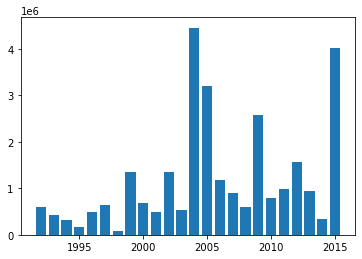

In [34]:
size=list(df1.fire_size)
year=list(df1.year)
plt.bar(year, size)